In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from NNS import NeuralNetwork as NN #import neural net code from github to reduce copy/pasting
from NNS import load_MNIST_Data
from tqdm import tqdm
import cv2
import os

# Chapter 22 Prediction / Inference

In [2]:
# Create dataset
X, y, X_test, y_test = load_MNIST_Data.create_data_mnist( 'fashion_mnist_images' )
# Scale and reshape samples
X_test = (X_test.reshape(X_test.shape[0], - 1 ).astype(np.float32) - 127.5 ) / 127.5

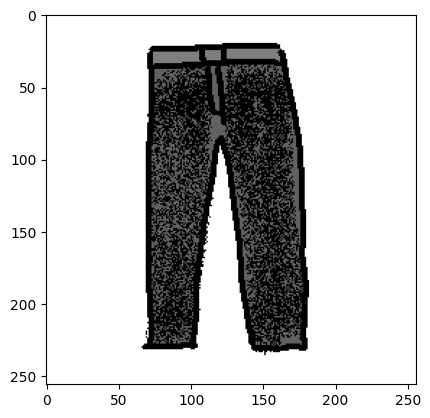

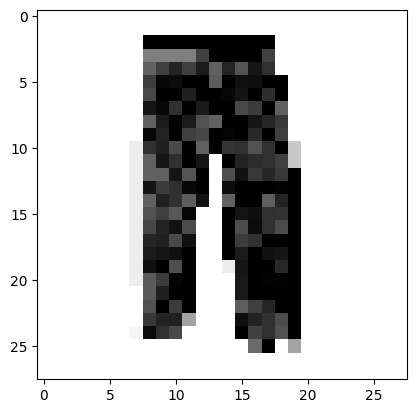

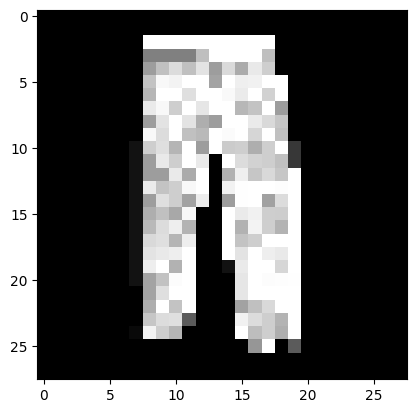

In [3]:

# Construct relative path based on current working directory
image_path = os.path.join(os.getcwd(), 'fashion_mnist_images', 'pants.png')

# Read the image in grayscale
image_data = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Check if the image is loaded properly
if image_data is None:
    raise FileNotFoundError(f"Image not found or unable to load at {image_path}.")

plt.imshow(image_data, cmap='gray')
plt.show()

# Display the grayscale image
# Resize to the same size as Fashion MNIST images
image_data = cv2.resize(image_data, (28 , 28))

plt.imshow(image_data, cmap='gray')
plt.show()

# Invert image colors
image_data = 255 - image_data

plt.imshow(image_data, cmap='gray')
plt.show()

# Reshape and scale pixel data
image_data = (image_data.reshape( 1 , - 1 ).astype(np.float32) - 127.5 ) / 127.5

In [ ]:
# Label index to label name relation, for the example we are looking for pants
fashion_mnist_labels = {
    0 : 'T-shirt/top' ,
    1 : 'Pants' ,
    2 : 'Pullover' ,
    3 : 'Dress' ,
    4 : 'Coat' ,
    5 : 'Sandal' ,
    6 : 'Shirt' ,
    7 : 'Sneaker' ,
    8 : 'Bag' ,
    9 : 'Ankle boot'
}


# Load the model
model = NN.Model.load( 'fashion_mnist.model' )

# Predict on the image
confidences = model.predict(image_data)

# Get prediction instead of confidence levels
predictions = model.output_layer_activation.predictions(confidences)
# Get label name from label index
prediction = fashion_mnist_labels[predictions[0]]

print(prediction)


Pants
